1. Importacion de librerias, lectura de archivo y primeras visualizaciones.

In [3]:
#Importamos las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Lectura del archivo
ComprasFinal = pd.read_csv("/Users/Macbook/Downloads/InventoryDataset/PurchasesFINAL12312016.csv",sep=',')

In [5]:
#Comprobamos la cantidad de registros 
np.shape (ComprasFinal)

(2372474, 16)

In [6]:
#Visualizamos las primeras 5 filas
ComprasFinal.head ()

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1


In [7]:
#Corroboramos el tipo de dato de las columnas
print (ComprasFinal.dtypes)

InventoryId        object
Store               int64
Brand               int64
Description        object
Size               object
VendorNumber        int64
VendorName         object
PONumber            int64
PODate             object
ReceivingDate      object
InvoiceDate        object
PayDate            object
PurchasePrice     float64
Quantity            int64
Dollars           float64
Classification      int64
dtype: object


In [8]:
#Verificamos la cantidad de datos faltantes por columna
print(ComprasFinal.isnull().sum())

InventoryId       0
Store             0
Brand             0
Description       0
Size              3
VendorNumber      0
VendorName        0
PONumber          0
PODate            0
ReceivingDate     0
InvoiceDate       0
PayDate           0
PurchasePrice     0
Quantity          0
Dollars           0
Classification    0
dtype: int64


In [9]:
#Verificamos las filas con valores nulos
Compras_filas_nulas = ComprasFinal.isnull().any(axis=1)

#Mostramos las filas con valores nulos
Compras_filas_con_nulos = ComprasFinal [Compras_filas_nulas]

#Imprimimos las filas con valores nulos
if not Compras_filas_con_nulos.empty:
    print("Filas con valores nulos encontradas:")
    print(Compras_filas_con_nulos)
else:
    print("No se encontraron filas con valores nulos.")

Filas con valores nulos encontradas:
                 InventoryId  Store  Brand                 Description Size  \
1109668    34_PITMERDEN_3121     34   3121    Pinnacle Rainbow Sherbet  NaN   
1112426    34_PITMERDEN_5678     34   5678      Skinnygirl Pina Colada  NaN   
1116302  39_EASTHALLOW_15365     39  15365  Alabaster 07 Tinta de Toro  NaN   

         VendorNumber                   VendorName  PONumber      PODate  \
1109668         12546  JIM BEAM BRANDS COMPANY         10938  2016-06-27   
1112426         12546  JIM BEAM BRANDS COMPANY         10938  2016-06-27   
1116302          9552  M S WALKER INC                  10972  2016-06-29   

        ReceivingDate InvoiceDate     PayDate  PurchasePrice  Quantity  \
1109668    2016-07-04  2016-07-13  2016-08-16           6.93         7   
1112426    2016-07-09  2016-07-13  2016-08-16           6.93         6   
1116302    2016-07-07  2016-07-13  2016-08-21          91.83         1   

         Dollars  Classification  
1109668  

In [10]:
# Verificamos si hay filas duplicadas
filas_duplicadas = ComprasFinal.duplicated()

# Contamos el número de filas duplicadas
contar_filas_duplicadas = filas_duplicadas.sum()

# Mostramos el número de filas duplicadas
print(f'Número de filas duplicadas en la tabla Compras: {contar_filas_duplicadas}')

#Imprimimos
if contar_filas_duplicadas > 0:
    print("Filas duplicadas en la tabla Producto:")
    print(ComprasFinal[filas_duplicadas])

Número de filas duplicadas en la tabla Compras: 0


In [11]:
#Verificamos si hay valores negativos en las columnas
negatives = ComprasFinal.select_dtypes(include=['number']) < 0

# Obtenemos los nombres de las columnas que tienen valores negativos
negative_columns = negatives.any()

# Filtramos las columnas que tienen al menos un valor negativo
columns_with_negatives = negative_columns[negative_columns].index.tolist()

# Imprimimos los resultados
if columns_with_negatives:
    print(f"Columnas con valores negativos: {columns_with_negatives}")
    for column in columns_with_negatives:
        print(f"\nValores negativos en la columna '{column}':")
        print(ComprasFinal[ComprasFinal[column] < 0])
else:
    print("No hay valores negativos en el Dataframe.")

No hay valores negativos en el Dataframe.


In [12]:
# Convertimos las columnas que tienen dato fecha al formato correcto

# Listamos las columnas a convertir
date_columns = ['PODate', 'ReceivingDate', 'InvoiceDate', 'PayDate']

# Convertimos las columnas a formato datetime con un ciclo For
for col in date_columns:
    ComprasFinal[col] = pd.to_datetime(ComprasFinal[col], errors='coerce')

# Imprimimos para verificar los tipos de datos después de la conversión
print(ComprasFinal.dtypes)

# Imprimimos las primeras filas para verificar los datos después de la conversión
print(ComprasFinal[date_columns].head())

# Verificamos la cantidad de valores nulos en las columnas de fecha
print(ComprasFinal[date_columns].isnull().sum())


InventoryId               object
Store                      int64
Brand                      int64
Description               object
Size                      object
VendorNumber               int64
VendorName                object
PONumber                   int64
PODate            datetime64[ns]
ReceivingDate     datetime64[ns]
InvoiceDate       datetime64[ns]
PayDate           datetime64[ns]
PurchasePrice            float64
Quantity                   int64
Dollars                  float64
Classification             int64
dtype: object
      PODate ReceivingDate InvoiceDate    PayDate
0 2015-12-21    2016-01-02  2016-01-04 2016-02-16
1 2015-12-22    2016-01-01  2016-01-07 2016-02-21
2 2015-12-22    2016-01-02  2016-01-07 2016-02-21
3 2015-12-22    2016-01-01  2016-01-07 2016-02-21
4 2015-12-24    2016-01-02  2016-01-09 2016-02-16
PODate           0
ReceivingDate    0
InvoiceDate      0
PayDate          0
dtype: int64


2. Tratamiento de valores faltantes.

Observamos que tenemos 3 valores faltantes de un total de 2372474 y estos datos no son recuperables, por lo cual se opta por eliminar estos 3 registros

In [13]:
#Eliminamos las filas con nulls
ComprasFinal = ComprasFinal[ComprasFinal['Size'].notna()]

In [14]:
#Verificamos la cantidad de datos faltantes por columna
print(ComprasFinal.isnull().sum())

InventoryId       0
Store             0
Brand             0
Description       0
Size              0
VendorNumber      0
VendorName        0
PONumber          0
PODate            0
ReceivingDate     0
InvoiceDate       0
PayDate           0
PurchasePrice     0
Quantity          0
Dollars           0
Classification    0
dtype: int64


In [15]:
#Comprobamos la cantidad de registros 
np.shape (ComprasFinal)

(2372471, 16)

3. Analisis explotario de los datos

EDA (Análisis Exploratorio de Datos) es una etapa crucial en el análisis de datos. En este punto, trataremos de explorar y entender los datos, es el proceso de examinar y resumir las principales características de un conjunto de datos.. El EDA implica varias técnicas y herramientas que te ayudan a obtener una visión clara de la estructura y las características de tus datos. El objetivo es identificar patrones y detectar valores atípicos.

Realizamos un analisis descriptivo de cada columna

In [16]:
# Configuramos el formato de visualización para evitar notación científica y redondear a dos decimales
pd.options.display.float_format = '{:.2f}'.format

# Con un ciclo FOR, obtenemos medidas descriptivas básicas para entender mejor los datos
for i in ComprasFinal.columns:
    print(i)
    print(ComprasFinal[i].describe()) 
    print('------------------------')

InventoryId
count               2372471
unique               245906
top       73_DONCASTER_8068
freq                    180
Name: InventoryId, dtype: object
------------------------
Store
count   2372471.00
mean         44.65
std          23.51
min           1.00
25%          25.00
50%          48.00
75%          67.00
max          81.00
Name: Store, dtype: float64
------------------------
Brand
count   2372471.00
mean      12418.65
std       12557.28
min          58.00
25%        3639.00
50%        6523.00
75%       18877.00
max       90631.00
Name: Brand, dtype: float64
------------------------
Description
count                   2372471
unique                     9651
top       Tito's Handmade Vodka
freq                      16442
Name: Description, dtype: object
------------------------
Size
count     2372471
unique         51
top         750mL
freq      1207700
Name: Size, dtype: object
------------------------
VendorNumber
count   2372471.00
mean       6886.43
std        8066.70


In [17]:
# Contamos la cantidad de pedidos por tienda
pedidos_por_tienda = ComprasFinal['Store'].value_counts().reset_index()
pedidos_por_tienda.columns = ['Tienda', 'Cantidad de Pedidos']

# Seleccionar las 10 tiendas con mayor cantidad de pedidos
top_tiendas = pedidos_por_tienda.head(11)

# Mostrar la tabla de las 10 tiendas con mayor cantidad de pedidos
print("Top 10 Tiendas con Mayor Cantidad de Pedidos:")
print(top_tiendas)

Top 10 Tiendas con Mayor Cantidad de Pedidos:
    Tienda  Cantidad de Pedidos
0       76               121123
1       73                96794
2       38                93412
3       34                92111
4       66                82699
5       67                69419
6       50                65512
7       69                63683
8       60                58169
9       41                53344
10      15                51844


In [18]:
# Analizamos si las ordenes tienes distintas fechas de entrega

#Agrupamos por PONumber y contamos las fechas de entrega únicas para cada orden
po_receiving_dates = ComprasFinal.groupby('PONumber')['ReceivingDate'].nunique().reset_index()

# Filtramos las órdenes que tienen más de una fecha de entrega
multiple_receiving_dates = po_receiving_dates[po_receiving_dates['ReceivingDate'] > 1]

#Imprimimos
print("Órdenes con múltiples fechas de entrega:")
print(multiple_receiving_dates)

Órdenes con múltiples fechas de entrega:
      PONumber  ReceivingDate
0         8106              3
1         8107              2
2         8108              3
3         8109              3
4         8110              3
...        ...            ...
5538     13657              6
5539     13658              6
5540     13659              5
5541     13660              4
5542     13661              6

[5000 rows x 2 columns]


In [31]:
# Generamos el Top 10 compras mas grandes
top_compras = ComprasFinal[['Brand', 'Description', 'PurchasePrice']].nlargest(10, 'PurchasePrice').reset_index(drop=True)
print("Top 10 Compras mas grandes:")
print(top_costosos)


Top 10 Compras mas grandes:
   Brand                   Description  PurchasePrice
0   3949     Patron En Lalique Tequila        5681.81
1   3949     Patron En Lalique Tequila        5681.81
2   3949     Patron En Lalique Tequila        5681.81
3   2367            Glenmorangie Pride        4264.70
4   2367            Glenmorangie Pride        4264.70
5    423       Hennessy Richard Cognac        3352.93
6    423       Hennessy Richard Cognac        3352.93
7    423       Hennessy Richard Cognac        3352.93
8   8385  Glenfiddich 1978 Rare Collct        2713.17
9   1251  Port Ellen 32 Yr Single Malt        2661.86


In [20]:
#Vamos a analizar las distintas fechas de nuestra tabla
#Definimos una lista de columnas de fechas
columns_of_interest = ['PODate', 'ReceivingDate', 'InvoiceDate', 'PayDate']

#Creamos la función para imprimir las estadísticas de una columna
def print_column_stats(df, column):
    print(f"\nEstadísticas para la columna '{column}':")
    print(f"Número total de valores: {len(df[column])}")
    column_stats = df[column].describe()
    print(f"Número total de valores: {column_stats['count']}")
    print(f"Valor mínimo: {df[column].min()}")
    print(f"Valor máximo: {df[column].max()}")

# Iteramos con un ciclo For sobre las columnas e imprimimos
for column in columns_of_interest:
    print_column_stats(ComprasFinal, column)


Estadísticas para la columna 'PODate':
Número total de valores: 2372471
Número total de valores: 2372471
Valor mínimo: 2015-12-20 00:00:00
Valor máximo: 2016-12-23 00:00:00

Estadísticas para la columna 'ReceivingDate':
Número total de valores: 2372471
Número total de valores: 2372471
Valor mínimo: 2016-01-01 00:00:00
Valor máximo: 2016-12-31 00:00:00

Estadísticas para la columna 'InvoiceDate':
Número total de valores: 2372471
Número total de valores: 2372471
Valor mínimo: 2016-01-04 00:00:00
Valor máximo: 2017-01-10 00:00:00

Estadísticas para la columna 'PayDate':
Número total de valores: 2372471
Número total de valores: 2372471
Valor mínimo: 2016-02-04 00:00:00
Valor máximo: 2017-02-19 00:00:00


In [21]:
#Analizamos las columnas que nos aportan otro tipo de dato significativo
#Creamos una lista
columns_of_interest = ['Store', 'Brand', 'VendorNumber']

#Definimos la función para imprimir las estadísticas
def print_column_stats(df, column):
    print(f"\nEstadísticas para la columna '{column}':")
    print(f"Número total de valores: {len(df[column])}")
    column_stats = df[column].describe()
    print(f"Número total de valores: {column_stats['count']}")
    print(f"Número de valores únicos: {df[column].nunique()}")
    print(f"Valor más frecuente (top): {df[column].mode()[0]}")
    print(f"Frecuencia del valor más frecuente: {df[column].value_counts().iloc[0]}")
    print(f"Valor mínimo: {column_stats['min']}")
    print(f"Valor máximo: {column_stats['max']}")
    print(f"Media: {column_stats['mean']}")

# Iteramos con un ciclo For sobre las columnas e imprimimos
for column in columns_of_interest:
    print_column_stats(ComprasFinal, column)


Estadísticas para la columna 'Store':
Número total de valores: 2372471
Número total de valores: 2372471.0
Número de valores únicos: 80
Valor más frecuente (top): 76
Frecuencia del valor más frecuente: 121123
Valor mínimo: 1.0
Valor máximo: 81.0
Media: 44.65133904692618

Estadísticas para la columna 'Brand':
Número total de valores: 2372471
Número total de valores: 2372471.0
Número de valores únicos: 10663
Valor más frecuente (top): 8068
Frecuencia del valor más frecuente: 7359
Valor mínimo: 58.0
Valor máximo: 90631.0
Media: 12418.646627925062

Estadísticas para la columna 'VendorNumber':
Número total de valores: 2372471
Número total de valores: 2372471.0
Número de valores únicos: 126
Valor más frecuente (top): 3960
Frecuencia del valor más frecuente: 243326
Valor mínimo: 2.0
Valor máximo: 201359.0
Media: 6886.429638549849


In [22]:
#Analizamos las columnas con tipo de dato float
#Creamos una lista
columns_of_interest = ['PurchasePrice', 'Dollars']

#Definimos la función para imprimir las estadísticas
def print_column_stats(df, column):
    print(f"\nEstadísticas para la columna '{column}':")
    print(f"Número total de valores: {len(df[column])}")
    column_stats = df[column].describe()
    print(f"Número total de valores: {column_stats['count']}")
    print(f"Número de valores únicos: {df[column].nunique()}")
    print(f"Valor más frecuente (top): {df[column].mode()[0]}")
    print(f"Frecuencia del valor más frecuente: {df[column].value_counts().iloc[0]}")
    print(f"Valor mínimo: {column_stats['min']}")
    print(f"Valor máximo: {column_stats['max']}")
    print(f"Media: {column_stats['mean']}")

# Iteramos con un ciclo For sobre las columnas e imprimimos
for column in columns_of_interest:
    print_column_stats(ComprasFinal, column)


Estadísticas para la columna 'PurchasePrice':
Número total de valores: 2372471
Número total de valores: 2372471.0
Número de valores únicos: 2151
Valor más frecuente (top): 5.84
Frecuencia del valor más frecuente: 21743
Valor mínimo: 0.0
Valor máximo: 5681.81
Media: 12.05002078845221

Estadísticas para la columna 'Dollars':
Número total de valores: 2372471
Número total de valores: 2372471.0
Número de valores únicos: 33567
Valor más frecuente (top): 39.96
Frecuencia del valor más frecuente: 7595
Valor mínimo: 0.0
Valor máximo: 50175.7
Media: 135.68156728153897


In [23]:
#Contamos cuantas celdas hay con precio=0 en la columna 'Purchaseprice
zero_price_count = (ComprasFinal['PurchasePrice'] == 0).sum()

#Imprimimos
print(f"Número de celdas con precio=0 en la columna 'PurchasePrice' es : {zero_price_count}")

Número de celdas con precio=0 en la columna 'PurchasePrice' es : 153


In [24]:
# Filtramos las filas donde 'PurchasePrice' es igual a 0
zero_price_rows = ComprasFinal[ComprasFinal['PurchasePrice'] == 0]

# Verificar si son el mismo producto 
grouped = zero_price_rows.groupby(['Description', 'Brand', 'VendorNumber']).size().reset_index(name='count')

#Imprimimos
print(grouped)

                   Description  Brand  VendorNumber  count
0  The Macallan Double Cask 12   2166          2561    153


In [25]:
#Vamos a encontrar el valor medio de cada columna para reemplazarlo en el valor 0 de "The Macallan Double Cask 12"

#Verificamos las filas que contienen "The Macallan Double Cask 12" en la columna Description
macallan_rows = ComprasFinal[ComprasFinal['Description'].str.contains("The Macallan Double Cask 12", na=False)]
print("\nFilas antes de la actualización:")
print(macallan_rows)

#Calculamos el valor medio de la columna PurchasePrice
mean_purchase_price = round(ComprasFinal['PurchasePrice'].mean(), 2)

print(f"\nValor medio de PurchasePrice: {mean_purchase_price}")

#Reemplazamos los valores en PurchasePrice para "The Macallan Double Cask 12" con los valores medios
ComprasFinal.loc[
    ComprasFinal['Description'].str.contains("The Macallan Double Cask 12", na=False), 
    ['PurchasePrice']
] = [mean_purchase_price]

# Verificamos las filas que contienen "The Macallan Double Cask 12" después del reemplazo
macallan_rows_updated = ComprasFinal[ComprasFinal['Description'].str.contains("The Macallan Double Cask 12", na=False)]
print("\nFilas después de la actualización:")
print(macallan_rows_updated)


Filas antes de la actualización:
                   InventoryId  Store  Brand                  Description  \
1369009    59_CLAETHORPES_2166     59   2166  The Macallan Double Cask 12   
1369018      38_GOULCREST_2166     38   2166  The Macallan Double Cask 12   
1369031      34_PITMERDEN_2166     34   2166  The Macallan Double Cask 12   
1369032     44_PORTHCRAWL_2166     44   2166  The Macallan Double Cask 12   
1369033  56_BEGGAR'S HOLE_2166     56   2166  The Macallan Double Cask 12   
...                        ...    ...    ...                          ...   
2278896     39_EASTHALLOW_2166     39   2166  The Macallan Double Cask 12   
2278909      38_GOULCREST_2166     38   2166  The Macallan Double Cask 12   
2278922       9_BLACKPOOL_2166      9   2166  The Macallan Double Cask 12   
2278954    20_BREDWARDINE_2166     20   2166  The Macallan Double Cask 12   
2278958        31_HORNSEY_2166     31   2166  The Macallan Double Cask 12   

          Size  VendorNumber             

In [26]:
#Contamos cuantas celdas hay con precio=0 en la columna 'Purchaseprice para confirmar los cambios
zero_price_count = (ComprasFinal['PurchasePrice'] == 0).sum()

#Imprimimos
print(f"Número de celdas con precio=0 en la columna 'PurchasePrice' es : {zero_price_count}")

Número de celdas con precio=0 en la columna 'PurchasePrice' es : 0


In [27]:
#Se analiza si hay productos que tienen mas de un proveedor 
#Agrupamos por producto y contamos los proveedores únicos (VendorNumber)
product_vendor_count = ComprasFinal.groupby(['Description', 'Brand'])['VendorNumber'].nunique().reset_index()

# Renombramos la columna para claridad
product_vendor_count.columns = ['Description', 'Brand', 'UniqueVendorCount']

# Filtramos productos que tienen más de un proveedor
multiple_vendors = product_vendor_count[product_vendor_count['UniqueVendorCount'] > 1]

# Imprimimos
print(multiple_vendors)

                        Description  Brand  UniqueVendorCount
940    Benton Lane Pnt Gris Willamt  42801                  2
941          Benton Lane Pnt Nr Ore  31384                  2
1029                Big Peat Scotch   2717                  2
2593             Chocolate Shop Red  17754                  2
2627   Cigar Zin Old Vine Zinfandel  18771                  2
2910       Corner Creek Rsv Bourbon   2879                  2
4048   Flavor Essence Variety 5 Pak  90609                  2
5167    Jaboulet Cotes du Rhone Par   6692                  2
5169   Jaboulet Crozes Herm 10 Thal  11259                  2
5170    Jaboulet Crozes Hermitage L  26889                  2
5171   Jaboulet Cts Rhone Parl Rose  11089                  2
6021        Le Grande Courtage Brut  21860                  2
6022        Le Grande Courtage Brut  21959                  2
6024        Le Grande Courtage Rose  21960                  2
6138                  Linie Aquavit   5322                  2
6383   M

In [28]:
# Crear la nueva columna Detalle_compraID con valores incrementales desde 1
ComprasFinal['Detalle_compraID'] = range(1, len(ComprasFinal) + 1)

ComprasFinal.head()

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification,Detalle_compraID
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1,2
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1,3
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1,4
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1,5


In [29]:
# Guardar el DataFrame filtrado en un archivo CSV
ComprasFinal.to_csv('/Users/Macbook/DISLICORES/DISLICORES/CSVFinales/Compras2016.csv', index=False)


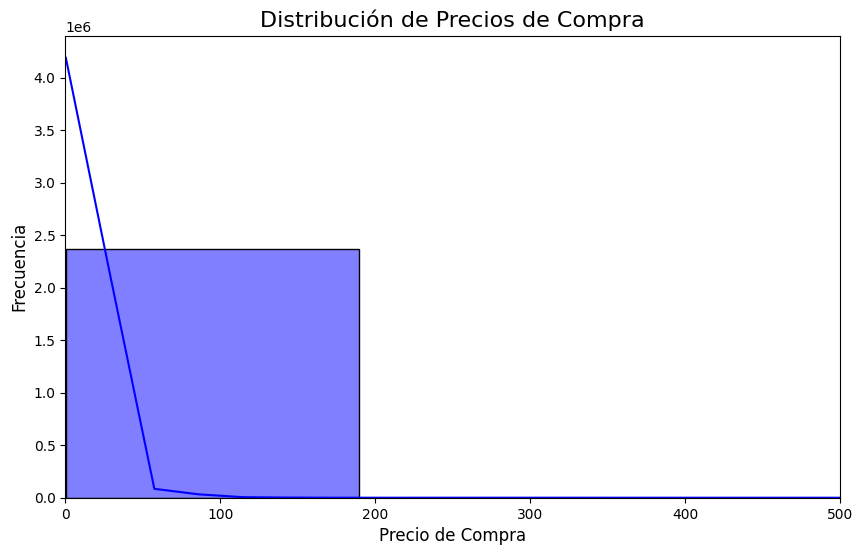

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de precios de compra
plt.figure(figsize=(10, 6))
sns.histplot(ComprasFinal['PurchasePrice'], bins=30, kde=True, color='blue')
plt.title('Distribución de Precios de Compra', fontsize=16)
plt.xlabel('Precio de Compra', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xlim(0, 500)
plt.show()
#los precios van de 0-190

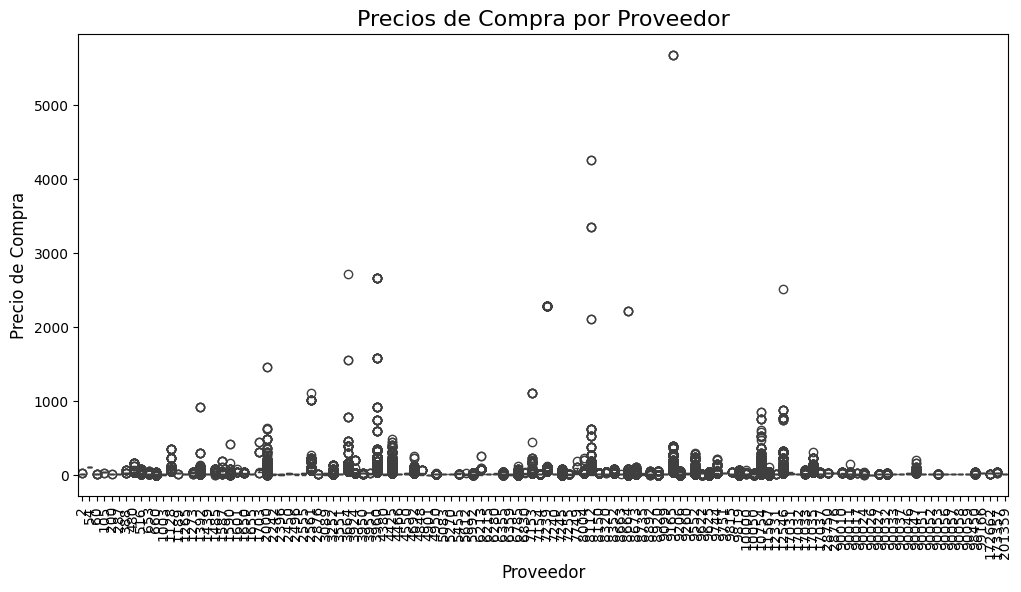

In [35]:
# Boxplot para mostrar la distribución de precios por proveedor (VendorNumber)
plt.figure(figsize=(12, 6))
sns.boxplot(x='VendorNumber', y='PurchasePrice', data=ComprasFinal)
plt.title('Precios de Compra por Proveedor', fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('Proveedor', fontsize=12)
plt.ylabel('Precio de Compra', fontsize=12)
plt.show()


/var/folders/c6/d3t23tts3l9fhhydkx1_2_4m0000gp/T/ipykernel_13387/3745430746.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=store_order_counts.index, y=store_order_counts.values, palette='viridis')


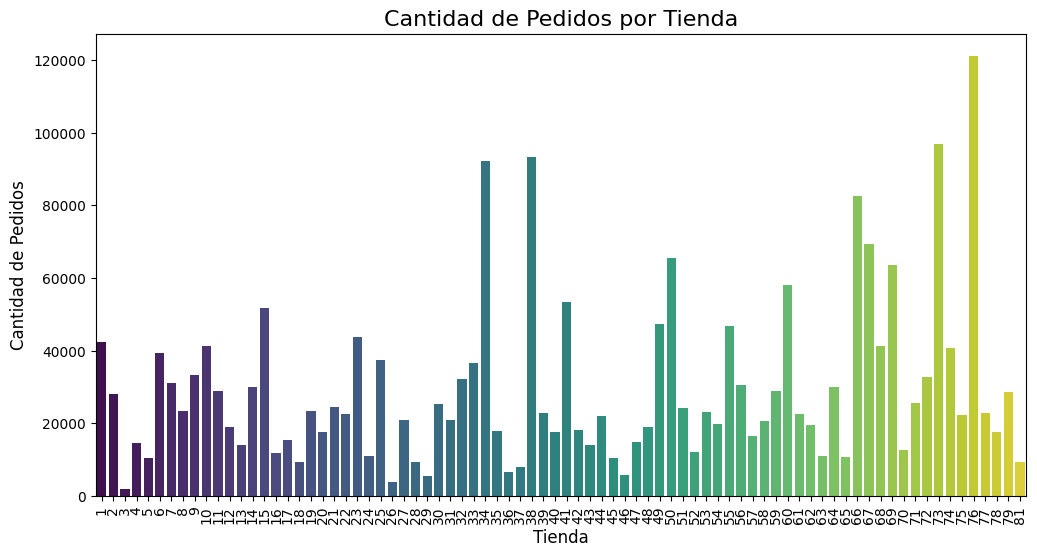

In [36]:
# Barplot de la cantidad de pedidos por tienda (Store)
plt.figure(figsize=(12, 6))
store_order_counts = ComprasFinal['Store'].value_counts()
sns.barplot(x=store_order_counts.index, y=store_order_counts.values, palette='viridis')
plt.title('Cantidad de Pedidos por Tienda', fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Cantidad de Pedidos', fontsize=12)
plt.show()


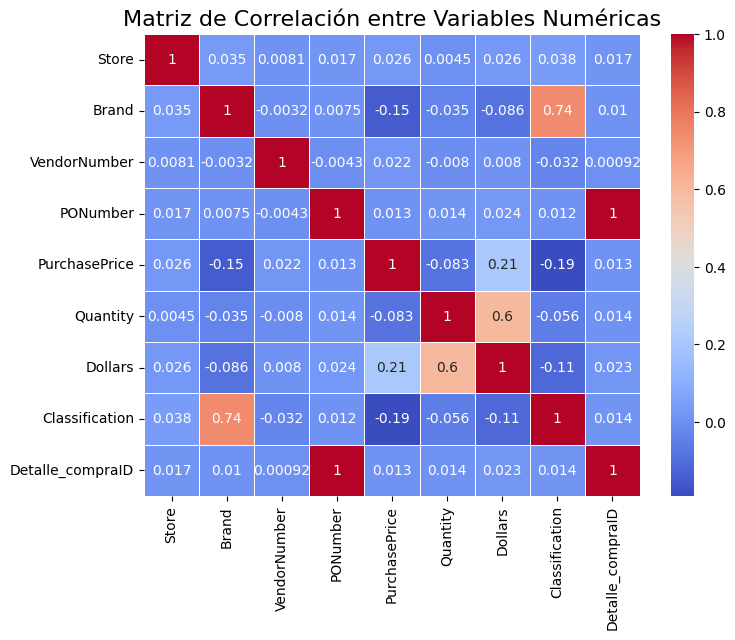

In [37]:
# Filtrar solo las columnas numéricas para la correlación
df_numeric = ComprasFinal.select_dtypes(include='number')

# Visualización de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas', fontsize=16)
plt.show()
